In [105]:
import pandas as pd
import numpy as np
import glob
import os

league_file = 'div3open_rankings.csv'
league_file = 'div2open_rankings.csv'
#league_file = 'div2fifty_rankings.csv'
#league_file = 'div3fifty_rankings.csv'

nnf = pd.read_csv(league_file, index_col=False)
nnf.head(20)

,player,avg_points,line_quality,team_quality,team,match_cnt,raw_score,power_rank,power_rank_pct,opponent_strength
0,zach_portnoy,1.000000,0.833333,1.000000,FC Greenwich 2,1,0.859245,221.0,100.0,0.283855
1,ryan_shockley,0.942857,0.944444,0.727273,Innis Arden 1,5,0.836596,220.0,100.0,0.519777
2,daniel_brous,0.832200,0.912698,0.909091,Bailiwick 1,7,0.827724,219.0,99.0,0.592509
3,christian_nagler,0.761905,0.902778,1.000000,FC Greenwich 2,2,0.814674,218.0,99.0,0.608409
4,ted_danforth,0.761905,0.972222,1.000000,FC Greenwich 2,2,0.814223,217.0,98.0,0.512808
5,adam_epstein,1.000000,0.555556,1.000000,FC Greenwich 2,1,0.812369,216.0,98.0,0.341716
6,stewie_whitman,0.841270,0.763889,1.000000,FC Greenwich 2,8,0.796782,215.0,97.0,0.436220
7,cyril_moulle-berteaux,0.768254,0.826389,1.000000,FC Greenwich 2,10,0.795109,214.0,97.0,0.560783
8,bobby_neuner,0.952381,0.555556,0.818182,Woodway 1,1,0.784484,213.0,96.0,0.541103
9,david_fink,0.716270,0.937500,0.909091,Bailiwick 1,8,0.783531,212.0,96.0,0.612609


In [106]:
team='Rowayton'
min_matches=3
xx=nnf.loc[(nnf.team.str.contains(team)) & (nnf.match_cnt>=match_num)]
xx[['player','power_rank_pct','opponent_strength','avg_points','line_quality','team_quality']]

,player,power_rank_pct,opponent_strength,avg_points,line_quality,team_quality
31,mark_ableman,86.0,0.691369,0.809524,0.833333,0.272727
57,adam_king,74.0,0.543355,0.648526,0.912698,0.272727
69,alex_roszkowski,69.0,0.576916,0.634921,0.833333,0.272727
73,john_leslie,67.0,0.561954,0.643739,0.802469,0.272727
82,stefan_wagner,63.0,0.597853,0.507937,0.972222,0.272727
93,joe_rogers,58.0,0.499421,0.646825,0.625000,0.272727
95,alex_luchars,57.0,0.516165,0.611111,0.663580,0.272727
100,adam_king(retired),55.0,0.741761,0.428571,0.833333,0.272727
101,stefan_wagner(retired),55.0,0.741761,0.428571,0.833333,0.272727
127,mark_heffern,43.0,0.594990,0.469388,0.634921,0.272727


In [107]:
name='jack_birch'
idx = nnf.loc[nnf.player.str.contains(name)]
print(idx)
nnf.iloc[idx.index[0]-5:idx.index[0]+5]

         player  avg_points  line_quality  team_quality        team  \
176  jack_birch    0.266667      0.388889      0.272727  Rowayton 1   

     match_cnt  raw_score  power_rank  power_rank_pct  opponent_strength  
176          5   0.338144        45.0            20.0           0.572136  


,player,avg_points,line_quality,team_quality,team,match_cnt,raw_score,power_rank,power_rank_pct,opponent_strength
171,rick_disesa,0.288889,0.222222,0.545455,Roxbury 1,5,0.354341,50.0,23.0,0.472039
172,paul_vittone,0.177249,0.949074,0.000000,Round Hill,6,0.353916,49.0,22.0,0.562263
173,ken_schmidt,0.257143,0.583333,0.090909,Middlesex 1,5,0.346975,48.0,22.0,0.642747
174,william_ewald(retired),0.428571,0.277778,0.000000,Round Hill,1,0.342530,46.5,21.0,0.627448
175,jon_old(retired),0.428571,0.277778,0.000000,Round Hill,1,0.342530,46.5,21.0,0.627448
176,jack_birch,0.266667,0.388889,0.272727,Rowayton 1,5,0.338144,45.0,20.0,0.572136
177,taran_bakker,0.642857,0.000000,0.000000,Round Hill,2,0.334113,44.0,20.0,0.298847
178,todd_morgan,0.317460,0.473251,0.090909,Middlesex 1,9,0.333417,43.0,19.0,0.518182
179,doug_hurst,0.235828,0.740741,0.000000,Round Hill,7,0.332253,42.0,19.0,0.519880
180,bourgeois_rod,0.238095,0.000000,0.727273,Innis Arden 1,2,0.329806,41.0,19.0,0.514726


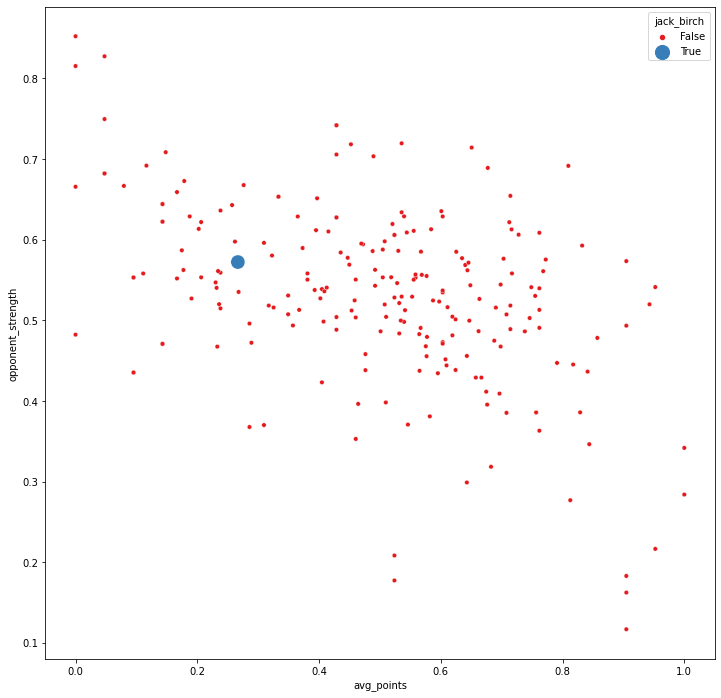

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))

sns.set_palette("Set1")
name="jack_birch"
nnf[name]=nnf.player.apply(lambda x: x==name)

g = sns.scatterplot(x="avg_points", y="opponent_strength", data=nnf, hue=name, size=name, sizes=[20,200])
g.figure.set_size_inches(12, 12)

In [109]:
c1=nnf.avg_points>.7
c2=nnf.opponent_strength>.67
nnf[c1&c2]

,player,avg_points,line_quality,team_quality,team,match_cnt,raw_score,power_rank,power_rank_pct,opponent_strength,jack_birch
31,mark_ableman,0.809524,0.833333,0.272727,Rowayton 1,1,0.689203,190.0,86.0,0.691369,False


In [150]:
league_file1 = 'div3open_rankings.csv'
league_file2 = 'div2open_rankings.csv'

dd = pd.read_csv(league_file2, index_col=False)
ddd = pd.read_csv(league_file1, index_col=False)

dd['player_id'] = (dd['player']+'_'+dd['team'])
dd['player_id'] = dd['player_id'].apply(lambda x: x.lower()[:-2])
ddd['player_id'] = (ddd['player']+'_'+ddd['team'])
ddd['player_id'] = ddd['player_id'].apply(lambda x: x.lower()[:-2])

xd = pd.merge(ddd,dd, on='player_id')
xd.columns

Index(['player_x', 'avg_points_x', 'line_quality_x', 'team_quality_x',
       'team_x', 'match_cnt_x', 'raw_score_x', 'power_rank_x',
       'power_rank_pct_x', 'opponent_strength_x', 'player_id', 'player_y',
       'avg_points_y', 'line_quality_y', 'team_quality_y', 'team_y',
       'match_cnt_y', 'raw_score_y', 'power_rank_y', 'power_rank_pct_y',
       'opponent_strength_y'],
      dtype='object')

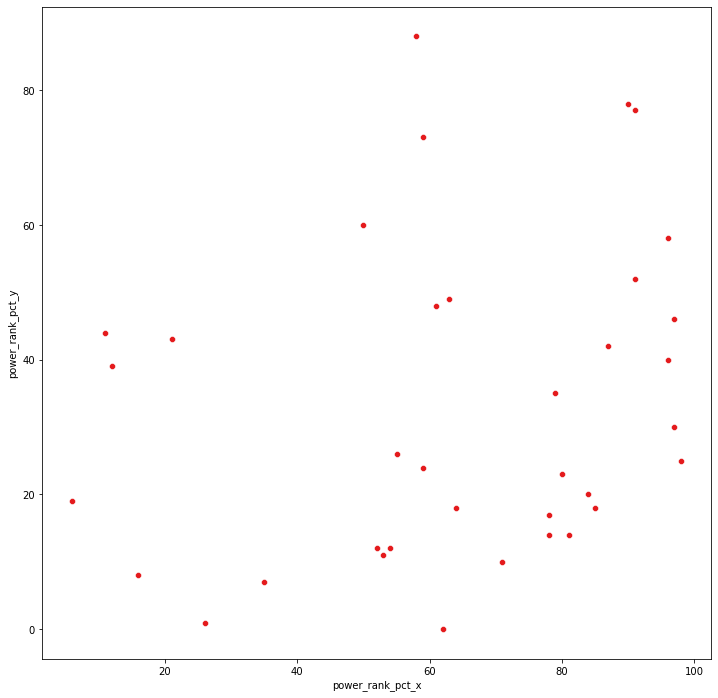

In [151]:
#xd[['player_id','power_rank_pct_x','power_rank_pct_y']]
gg = sns.scatterplot(x='power_rank_pct_x', y='power_rank_pct_y', data=xd)
gg.figure.set_size_inches(12, 12)

# 40 point differential across the board between div 2 and div 3



In [186]:
xd[['player_id','power_rank_pct_x','power_rank_pct_y']].sort_values('power_rank_pct_x', ascending=False).describe()
nnf.columns

Index(['player', 'avg_points', 'line_quality', 'team_quality', 'team',
       'match_cnt', 'raw_score', 'power_rank', 'power_rank_pct',
       'opponent_strength', 'jack_birch', 'player_category'],
      dtype='object')

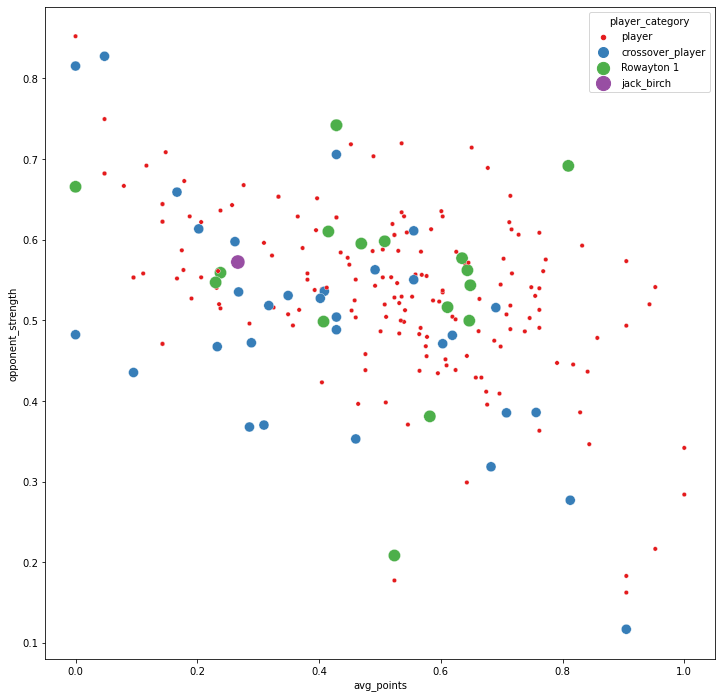

In [192]:
sns.set_palette("Set1")
name="jack_birch"
team="Rowayton 1"

def playergroups(row):
    #print(row['team'],(team), row['team'].find(team))
    if row['player'] == name:
        return name
    elif row['team'].find(team)>=0:
        return team
    elif row['player'] in xd.player_x.tolist():
        return 'crossover_player'
    else:
        return 'player'

nnf['player_category']=nnf.apply(lambda row: playergroups(row), axis=1)

g = sns.scatterplot(x="avg_points", y="opponent_strength", data=nnf, hue='player_category', size='player_category', sizes=[20,100,150, 200])
g.figure.set_size_inches(12, 12)

In [194]:
games = pd.read_csv('div3open_games.csv')
games[games.t1p1]

,line,t1score,t2score,t1p1,t1p2,t2p1,t2p2,team1,team2,t1_points,t2_points
0,1,267,636,john_massey,dan_murphy,richard_rosenthal,marc_robustelli,Tokeneke 2,Wilton Riding,0.0,-0.0
1,2,43,66,ian_smith,david_magrone,david_gould,mike_ward,Tokeneke 2,Wilton Riding,-2.5,2.5
2,3,44,66,steven_trepp,jp_peter,steve_batter,kurt_schneider,Tokeneke 2,Wilton Riding,-2.0,2.0
3,4,41,66,jay_bennett,ed_canaday,dave_koch,ryan_faherty,Tokeneke 2,Wilton Riding,-3.5,3.5
4,1,30,64,sergey_chernysh,dzuy-thanh_luong,john_hutchins,richard_fortin,Rowayton 2,New Canaan FC 2,-3.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...
249,4,66,22,lance_pendelton,bob_vredenburgh,george_cahill,luke_schroeder,Four Seasons 3,Woodway 2,4.0,-4.0
250,1,66,2,tom_moellering,rob_zabronsky,jim_bradford,wiks_moffat,Roxbury 2,Roton Point 2,5.0,-5.0
251,2,66,34,scott_muller,alain_villemure,matthew_tocks,jason_temerowski,Roxbury 2,Roton Point 2,2.5,-2.5
252,3,66,2,jim_glynn,jose_lievano,william_bell,nelson_jantzen,Roxbury 2,Roton Point 2,5.0,-5.0
